In [68]:
import pandas as pd
import re
from nltk.corpus import stopwords
import string
from nltk.stem.snowball import SnowballStemmer

In [69]:
# Reading the data file into a DATAFRAME and checking the shape 
data=pd.read_csv('35.1AmazonMobileDataUncleaned.csv')
print(data.shape)

(71922, 2)


In [71]:
def datapreprocess(sen):
    
    sen = re.sub(r"didn't", "did not", sen)
    sen = re.sub(r"don't", "do not", sen)
    sen = re.sub(r"won't", "will not", sen)
    sen = re.sub(r"can't", "can not", sen)
    sen = re.sub(r"wasn't", "do not", sen)
    sen = re.sub(r"\'ve", " have", sen)
    sen = re.sub(r"\'m", " am", sen)
    sen = re.sub(r"\'ll", " will", sen)
    sen = re.sub(r"\'re", " are", sen)
    sen = re.sub(r"\'s", " is", sen)
    sen = re.sub(r"\'d", " would", sen)
    sen = re.sub(r"\'t", " not", sen)
    sen = re.sub(r"\'m", " am", sen)
    sen = re.sub(r"n\'t", " not", sen)
    
    p = set(string.punctuation) # p take all the punctuations, punctuations displayed below
    sen=sen.lower() # convert text to lower case
    words=sen.split() # split the text into words
    ctext=[]
    for i in range(10): #adding numbers from 0 - 9 to p 
        p.add(str(i))
    for i in words:
        t=''.join([x for x in i.encode("ascii","ignore").decode("ascii") if x not in p]) # ignoring non ascii charecters and numbers
        ctext.append(t)
    return " ".join([i for i in ctext]) # joining the cleaned words to text
    
    

stop=set(stopwords.words('english'))
print(stop)
stop.remove('no')
stop.remove('not')
stop.remove('nor')

preprocessed_essays = []
for sentance in data['uncleanedreview'].values:
    try:
        ctxt=datapreprocess(str(sentance))
        if len(ctxt)==0: raise()
        ctxt = ' '.join(e for e in ctxt.split() if e not in stop)
        preprocessed_essays.append(ctxt.lower().strip())
    except:
        preprocessed_essays.append("NAN")  
data['cleanedtext'] = preprocessed_essays
data.drop(data[data["cleanedtext"]=="NAN"].index,axis = 0,inplace = True) # deleting rows that have no text 
data=data.reset_index(drop='true') # after deleting rows index should be reset
data['decision']= data['decision'].replace('positive',1)
data['decision']= data['decision'].replace('negative',0)


s = SnowballStemmer("english")
p=[]
for i in data['cleanedtext'].values:
    k=[]
    for word in i.split():
        k.append(s.stem(word))
    l=' '.join(k)
    p.append(l)

data['j']=p

data.to_csv (r'AmazonMobileDataCleaned.csv')

{'has', 'through', 'under', 'isn', 'is', 'other', 'further', "isn't", 'once', 'such', 'some', 'are', 'don', 'had', 'all', 'hadn', 'as', 'what', 'were', 'itself', 'too', 'of', "she's", 'their', 'themselves', 'ourselves', 'didn', 'needn', 'whom', 'have', 'ain', 'about', "doesn't", 'for', 'they', 'yourself', 'shouldn', 'o', 'does', 'it', 'until', 'you', 'between', 'doesn', "hadn't", 'over', 'her', 'than', 'out', 'weren', 'before', 'here', 'then', 'ours', 'no', "it's", "shouldn't", 'how', "won't", 'hers', 'so', 'when', 'which', 'in', "weren't", 'who', 'there', 'during', 'wouldn', 'your', 'am', 'll', "you'd", 'and', "wouldn't", "don't", 'against', 'not', 's', 'to', 'she', 'yourselves', 'but', 've', 'these', 'been', 'only', 'where', 'himself', 'aren', 'his', "mustn't", "shan't", 'wasn', 'into', 'will', 'just', 'him', 'herself', 'an', 'y', 'each', 'that', 'd', 'we', "mightn't", "wasn't", "you've", 'own', 'being', 'while', 't', 'couldn', 'was', 'below', 'mustn', 'why', 'up', 'nor', 'our', 'sam

In [72]:
data=pd.read_csv('AmazonMobileDataCleaned.csv',nrows=5000)
print(data.shape)
label = data['decision'].values
feedback = data.drop(['decision'], axis=1)
print(label.shape)
print(feedback.shape)
print("------------------------------")

from sklearn.model_selection import train_test_split
inputtrain, inputtest, outputtrain, outputtest = train_test_split(feedback, label, test_size=0.20, stratify=label)
print(inputtrain.shape)
print(inputtest.shape)
print(outputtrain.shape)
print(outputtest.shape)

(5000, 5)
(5000,)
(5000, 4)
------------------------------
(4000, 4)
(1000, 4)
(4000,)
(1000,)


# WordCloud for both Training Positive and Negative Response

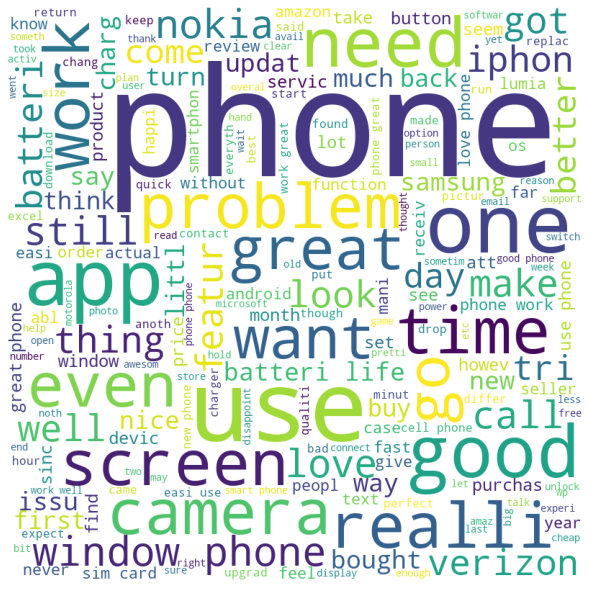

In [6]:
#print(data['clean_essay'])
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 
comment_words = ' '
stopwords = set(STOPWORDS) 
for val in inputtrain['j'].values: 
      
    
    val = str(val) 
  
     
    tokens = val.split() 
      
    
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
    
    
    
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 


In [109]:

inputtrain_1 = inputtrain.reset_index(drop=True)# Resetting index of inputtrain dataframe, so that inputtrain_1['j'] series has same index as of pd.Series(outputtrain)
training_df = pd.concat([inputtrain_1['j'], pd.Series(outputtrain)], axis = 1)# stacking the series horizontally
#training_df = df.dropna()
#training_df = df.reset_index(drop=True)

training_df=training_df.rename(columns={0:'decision'})#rename one of the column

In [110]:
print(inputtrain['j'][0:5])

print(inputtrain_1['j'][0:5])#resetted index
print(pd.Series(outputtrain)[0:5])

print(training_df[0:5])

1988    happi first smartphon month start run room ple...
2731    not buy amazon instead went verizon yet inform...
4930                     no good rplica dont get internet
193     found tracfon coverag ac spotti best nonexist ...
1563    thumb get way small buttomscaus unanticip chan...
Name: j, dtype: object
0    happi first smartphon month start run room ple...
1    not buy amazon instead went verizon yet inform...
2                     no good rplica dont get internet
3    found tracfon coverag ac spotti best nonexist ...
4    thumb get way small buttomscaus unanticip chan...
Name: j, dtype: object
0    1
1    0
2    1
3    1
4    0
dtype: int64
                                                   j  decision
0  happi first smartphon month start run room ple...         1
1  not buy amazon instead went verizon yet inform...         0
2                   no good rplica dont get internet         1
3  found tracfon coverag ac spotti best nonexist ...         1
4  thumb get way small but

# WordCloud for only Training positive feedback

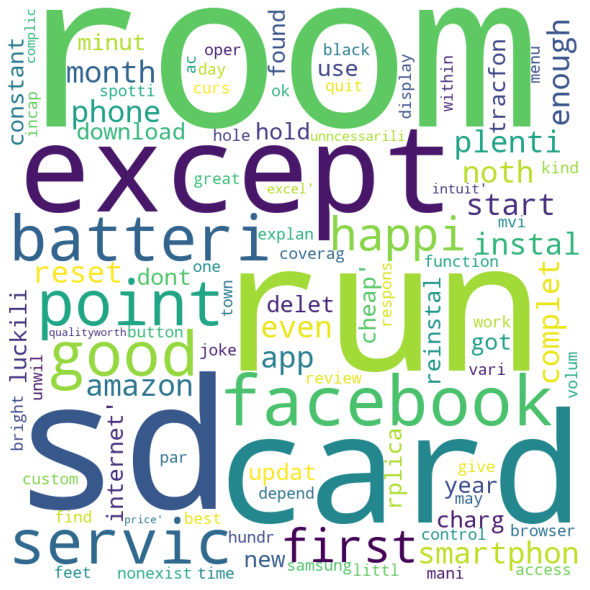

In [116]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 
comment_words = ' '
stopwords = set(STOPWORDS) 

positive_feedback_training_df = training_df[training_df['decision']==1]
positive_feedback_training_df = positive_feedback_training_df.reset_index(drop=True)
for val in positive_feedback_training_df[0:5].values:           
    val = str(val)      
    tokens = val.split()           
    for words in tokens: 
        comment_words = comment_words + words + ' '
    
       
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 


# WordCloud for only Training Negative feedback

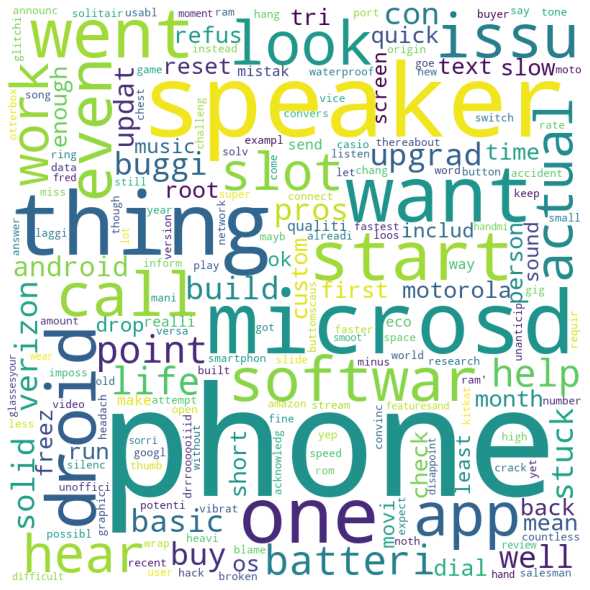

In [115]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 
comment_words = ' '
stopwords = set(STOPWORDS) 

negative_feedback_training_df = training_df[training_df['decision']==0]
negative_feedback_training_df = negative_feedback_training_df.reset_index(drop=True)
for val in negative_feedback_training_df[0:5].values:           
    val = str(val)      
    tokens = val.split()           
    for words in tokens: 
        comment_words = comment_words + words + ' '
    
       
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 
